In [25]:
import pandas as pd

data = pd.read_csv('../data/processed/processed_reweighted.csv')

In [26]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import Birch
import numpy as np
import math

data_rows = len(data)
scores = []
branching_factors = [i for i in range(2,51)]
thresholds = [i/10 for i in range(1,101)]


for branching_factor in branching_factors: 
    for threshold in thresholds: 
        birch = Birch(n_clusters=None,threshold=threshold, branching_factor=branching_factor)
        prediction = birch.fit_predict(X=data)
        n_clusters = len(np.unique(prediction))
        if n_clusters != 1 and n_clusters != data_rows:
            sc = silhouette_score(data, prediction)
            db = davies_bouldin_score(data, prediction)
            ch = calinski_harabasz_score(data, prediction)
            scores.append((branching_factor, threshold, sc, db, ch, prediction, n_clusters))


In [27]:
tested_branching_factors, tested_thresholds, scs, dbs, chs, predictions, n_clusters = zip(*scores)

In [28]:
placings_per_alt = {}

for i in range(len(scores)):
    placings_per_alt[(tested_branching_factors[i],tested_thresholds[i])] = {
        'branching_factor': tested_branching_factors[i],
        'threshold': tested_thresholds[i],
        'silhouette coefficient': scs[i],
        'davies-bouldin index': dbs[i],
        'calinski-harabasz index': chs[i],
        'prediction': predictions[i],
        'clusters': n_clusters[i]
    }

sorted_by_max_sc = sorted(scores, key=lambda score:score[2], reverse=True)
sorted_by_min_db = sorted(scores, key=lambda score:score[3], reverse=False)
sorted_by_max_ch = sorted(scores, key=lambda score:score[4], reverse=True)

for index, score in enumerate(sorted_by_max_sc):
    placings_per_alt[(score[0],score[1])]['max_sc'] = index

for index, score in enumerate(sorted_by_min_db):
    placings_per_alt[(score[0],score[1])]['min_db'] = index

for index, score in enumerate(sorted_by_max_ch):
    placings_per_alt[(score[0],score[1])]['max_ch'] = index



In [29]:

def overall_placing(score):
    alt = placings_per_alt[(score[0],score[1])]
    return (alt['max_sc']+alt['min_db']+alt['max_ch'])/3

sorted_scores_on_overall = sorted(scores, key=lambda score: overall_placing(score), reverse=False)

for index, score in enumerate(sorted_scores_on_overall):
    placings_per_alt[(score[0],score[1])]['overall'] = index

In [30]:
alts = sorted(placings_per_alt.values(),key=lambda alt:alt['overall'])
alts_list = [alt.values() for alt in alts]

In [31]:
sorted_branching_factors, sorted_thresholds, sorted_scs, sorted_dbs, sorted_chs, sorted_predictions, sorted_clusters, sorted_placing_sc, sorted_placing_db, sorted_placing_ch, sorted_overall = zip(*alts_list)

In [32]:
def points_in_clusters(distribution):
    amount_of_points_in_cluster = {}
    for cluster_id in distribution:
        if cluster_id in amount_of_points_in_cluster:
            amount_of_points_in_cluster[cluster_id] += 1
        else:
            amount_of_points_in_cluster[cluster_id] = 1
    return tuple(amount_of_points_in_cluster.values())

In [41]:
def print_info(i):
    print(f'Place {sorted_overall[i]:>2}. Hyperparameters: {sorted_branching_factors[i]:2}, {sorted_thresholds[i]}. Clusters: {sorted_clusters[i]:>3}. Scores: SC {sorted_scs[i]:.2f}, DB {sorted_dbs[i]:.2f}, CH {sorted_chs[i]:>6.2f}') 

In [42]:
top_amount = 30

for i in range(top_amount):
    print_info(i)

Place  0. Hyperparameters:  2, 1.0. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place  1. Hyperparameters:  2, 1.1. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place  2. Hyperparameters:  3, 1.0. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place  3. Hyperparameters:  3, 1.1. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place  4. Hyperparameters:  4, 1.0. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place  5. Hyperparameters:  4, 1.1. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place  6. Hyperparameters:  5, 1.0. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place  7. Hyperparameters: 15, 0.1. Clusters: 207. Scores: SC 0.01, DB 0.11, CH 100.46
Place  8. Hyperparameters:  5, 1.1. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place  9. Hyperparameters:  6, 1.0. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place 10. Hyperparameters:  6, 1.1. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place 11. Hyperparameters:  7, 1.0. Cluster

In [35]:
for i in range(top_amount):
    print(f'Place {sorted_overall[i]:>2}. Hyperparameters: {sorted_branching_factors[i]:>2}, {sorted_thresholds[i]}. Points in each cluster: {points_in_clusters(sorted_predictions[i])}')

Place  0. Hyperparameters:  2, 1.0. Points in each cluster: (49, 161)
Place  1. Hyperparameters:  2, 1.1. Points in each cluster: (49, 161)
Place  2. Hyperparameters:  3, 1.0. Points in each cluster: (49, 161)
Place  3. Hyperparameters:  3, 1.1. Points in each cluster: (49, 161)
Place  4. Hyperparameters:  4, 1.0. Points in each cluster: (49, 161)
Place  5. Hyperparameters:  4, 1.1. Points in each cluster: (49, 161)
Place  6. Hyperparameters:  5, 1.0. Points in each cluster: (49, 161)
Place  7. Hyperparameters: 15, 0.1. Points in each cluster: (1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [36]:
def is_trivial(i):
    return sorted_clusters[i] == 209 or points_in_clusters(sorted_predictions[i])[0] == 209

In [37]:
top_no_trivial = [i for i in range(len(sorted_overall)) if not is_trivial(i)][:top_amount]

In [43]:
for i in top_no_trivial:
    print_info(i)


Place  0. Hyperparameters:  2, 1.0. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place  1. Hyperparameters:  2, 1.1. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place  2. Hyperparameters:  3, 1.0. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place  3. Hyperparameters:  3, 1.1. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place  4. Hyperparameters:  4, 1.0. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place  5. Hyperparameters:  4, 1.1. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place  6. Hyperparameters:  5, 1.0. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place  7. Hyperparameters: 15, 0.1. Clusters: 207. Scores: SC 0.01, DB 0.11, CH 100.46
Place  8. Hyperparameters:  5, 1.1. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place  9. Hyperparameters:  6, 1.0. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place 10. Hyperparameters:  6, 1.1. Clusters:   2. Scores: SC 0.26, DB 1.59, CH  56.69
Place 11. Hyperparameters:  7, 1.0. Cluster

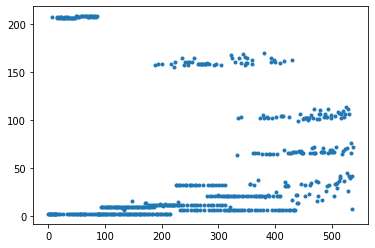

In [39]:
import matplotlib.pyplot as plt

plt.plot(sorted_overall, sorted_clusters,'.')

plt.show()

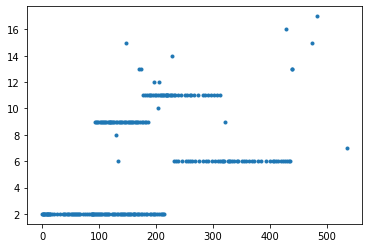

In [40]:
clusterings_under_20 = [(index, cluster_amount) for index, cluster_amount in enumerate(sorted_clusters) if cluster_amount < 20 ]

indexes_u20, cluster_amount_u20 = zip(*clusterings_under_20)

import matplotlib.pyplot as plt

plt.plot(indexes_u20, cluster_amount_u20,'.')

plt.show()